In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import tqdm
import json
from frbpa.utils import get_phase

In [2]:
with open('r3all_data.json', 'r') as f:
    r3_data = json.load(f)
    
burst_dict = r3_data['bursts']

In [3]:
period = 16.35
sidereal_day = 0.99727

In [4]:
dates_dict = {}
dates_dict['REST'] = np.zeros(0)
for k in burst_dict.keys():
    if 'CHIME' in k:
        dates_dict[k] = np.unique(np.round(burst_dict[k], 1))
    else:
        dates_dict['REST'] = np.concatenate((np.unique(np.round(burst_dict[k], 1)), dates_dict['REST']))

# Calculating standard deviation of non-CHIME burst phases at alias of sidereal day added to the original period


In [5]:
Ns = np.linspace(0,43,44) # harmonics
fns = Ns*(1/sidereal_day) + 1/period

In [6]:
stds = []
means = []

for f in tqdm.tqdm(fns):
    chime_p = get_phase(dates_dict['CHIME'], 1/f)
    rest_p = get_phase(dates_dict['REST'], 1/f)
    stds.append(np.std(rest_p))
    means.append(np.std(chime_p))

100%|██████████| 44/44 [00:00<00:00, 11144.96it/s]


In [7]:
Ns[np.argsort(stds)]

array([ 0.,  2., 11., 18., 16., 31., 42.,  7., 27., 35., 13., 28., 17.,
        5., 23., 33., 12.,  8., 39.,  9., 19., 41., 22., 21.,  3.,  4.,
       25., 36., 43., 38., 26., 37., 30., 32., 40., 10., 24., 34.,  6.,
        1., 14., 20., 29., 15.])

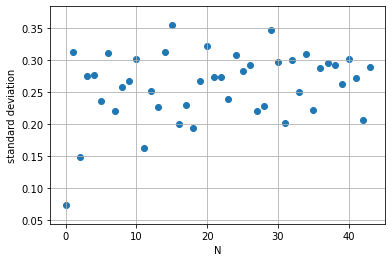

In [8]:
stds = np.array(stds)
plt.scatter(Ns, stds)
plt.ylabel('standard deviation')
plt.xlabel('N')
plt.grid()

# The lowest standard deviation is at N=0, consistent with PR3 (which used just Effelsberg bursts)